In [1]:
import pandas as pd
import numpy as np

In [2]:
#Show the dataframe shape.
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df.shape

(9134, 24)

In [3]:
#Standardize header names.
#df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

cols = []
for col in df.columns:
    cols.append(col.lower())
df.columns = cols

df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#Which columns are numerical?
list(df.select_dtypes(include=[np.number]).columns.values)

['customer lifetime value',
 'income',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'total claim amount']

In [5]:
#Which columns are categorical?
list(df.select_dtypes(include=[object]).columns.values)

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size']

In [6]:
#Check and deal with NaN values.
df.isna().sum().any()


False

In [7]:
#Display NaN values

display(df.isna().sum())


customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [8]:
#Fill missing values of numeric columns with mean value
#df1 = df.fillna(df.mean()) -> warning

for col in df.select_dtypes(include=np.number).columns:
    #df = df.fillna(np.mean(df[col]))
    df[col] = df[col].fillna(np.mean(df[col]))
    #df[col] = df[col].fillna.mean(), inplace=True)
#df.fillna(df.select_dtypes(include='number').mean(), inplace=True)




In [9]:
#Fill missing values of categorical columns with mode value
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    
#df.fillna(df.select_dtypes(include='object').mode(), inplace=True)
df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [10]:
# Reset index
df = df.reset_index(drop=True)

In [11]:
# Display NaN values again
display(df.isna().sum())

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [12]:
#Datetime format - Extract the months from the dataset and store in a separate column. 
#Then filter the data to show only the information for the first quarter , ie. January, February and March. 
#Hint: If data from March does not exist, consider only January and February.
import datetime
df['month'] = pd.to_datetime(df['effective to date']).dt.month
df = df[ (df['month']==1) | (df['month']==2) | (df['month']==3) ]
df['month']

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: month, Length: 9134, dtype: int64

In [13]:
#LAB Customer Analysis Round 3
#XEDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

In [14]:
#Show DataFrame info.
#Describe DataFrame.
#Show a plot of the total number of responses.
#Show a plot of the response rate by the sales channel.
#Show a plot of the response rate by the total claim amount.
#Show a plot of the response rate by income.

In [15]:
import pandas as pd
import numpy as np

In [16]:
#Show DataFrame info.
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [17]:
#Describe DataFrame.
df.describe()



,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<AxesSubplot:title={'center':'Responded'}>

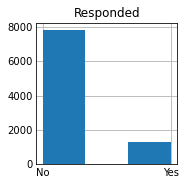

In [18]:
#Show a plot of the total number of responses.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('_mpl-gallery')

# make data
fig, ax = plt.subplots()
ax.set_title('Responded')

df['Response'].hist(bins=3, ax=ax)

In [19]:
#Show a plot of the response rate by the sales channel.
#Define sales per channel
agent_sales = len(df[(df['Sales Channel'] == 'Agent') & (df['Response'] == 'Yes')])
call_center_sales = len(df[(df['Sales Channel'] == 'Call Center') & (df['Response'] == 'Yes')])
web_sales = len(df[(df['Sales Channel'] == 'Web') & (df['Response'] == 'Yes')])
branch_sales = len(df[(df['Sales Channel'] == 'Branch') & (df['Response'] == 'Yes')])

In [20]:
#Define calls per channel
agent_calls = len(df[(df['Sales Channel'] == 'Agent')])
call_center_calls = len(df[(df['Sales Channel'] == 'Call Center')])
web_calls = len(df[(df['Sales Channel'] == 'Web')]) 
branch_calls = len(df[(df['Sales Channel'] == 'Branch')])

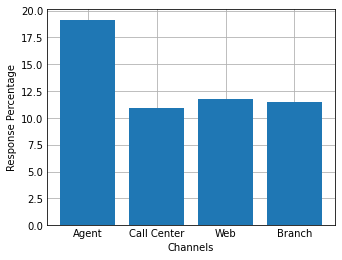

In [21]:
#Build plot
import matplotlib.pyplot as plt
x = [agent_sales * (100 / agent_calls), call_center_sales * (100 / call_center_calls), 
     web_sales *(100 / web_calls), branch_sales * (100 / branch_calls)]
     
     
labels = ['Agent', 'Call Center', 'Web', 'Branch']

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Response Percentage')
ax.set_xlabel('Channels')
ax.bar(labels,x)
plt.show()

In [22]:
df['Total Claim Amount']

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Response'>

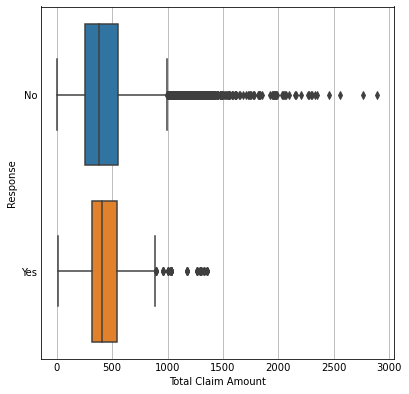

In [30]:
#Show a plot of the response rate by the total claim amount.

fig, ax = plt.subplots(figsize = (5,5))
sns.boxplot(data = df, y = "Response", x = "Total Claim Amount")

<AxesSubplot:xlabel='Income', ylabel='Response'>

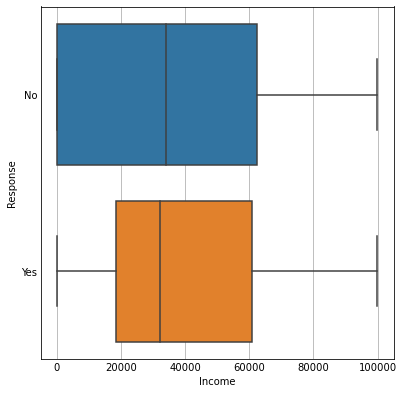

In [29]:
#Show a plot of the response rate by income.
fig, ax = plt.subplots(figsize = (5,5))
sns.boxplot(data = df, y = "Response", x = "Income")